<a href="https://colab.research.google.com/github/chanpapa/machine-learning-note/blob/main/MLNOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***学习笔记***


## 监督学习——Supervised Learning
指有目标变量或预测目标的机器学习方法，包括分类（classification）和回归（regression），区别是前者用于处理离散型变量，后者用于处理离散型变量。

正如视频中所示，"Given the right answer for each example"。监督学习中训练数据既有feature也有label，通过训练使机器能依据相应给定数据预测标签。
###回归——Regression
   #### 一、gradient decent梯度下降


例子：cost function(直接贴课程图)
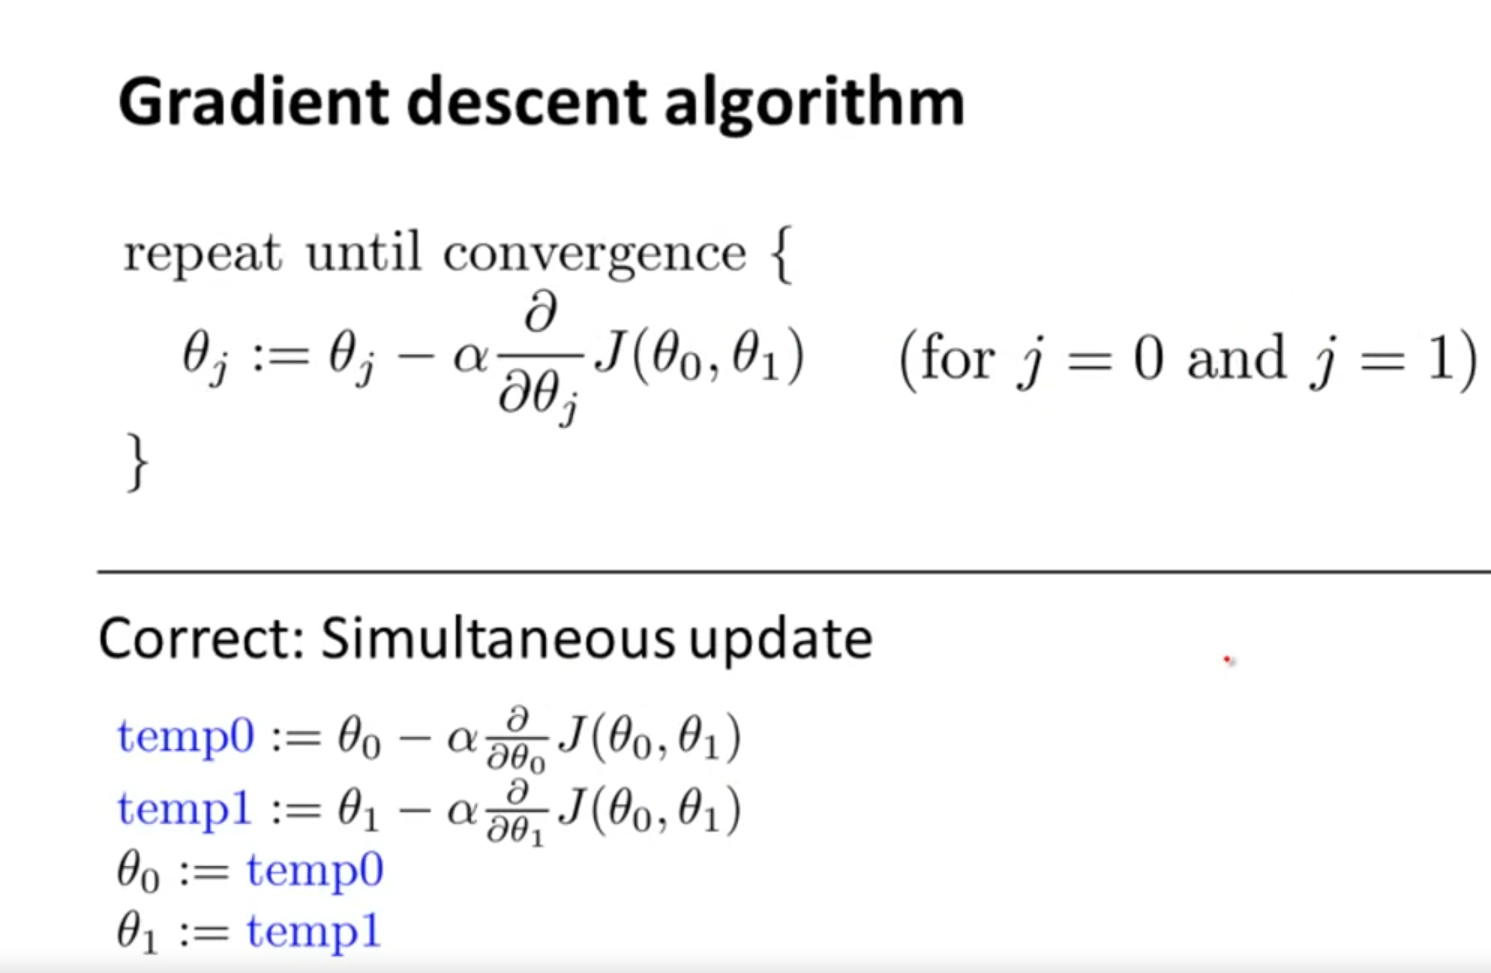

*注：1.α是学习速率Learning rate(后续课程中将会学习如何设置)*。

2.微分项应做到同步更新。（直接贴课程图）


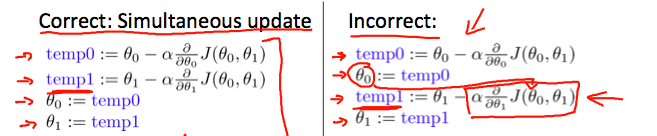

**下面进行回归代码练习——房价预测**
基本原理如图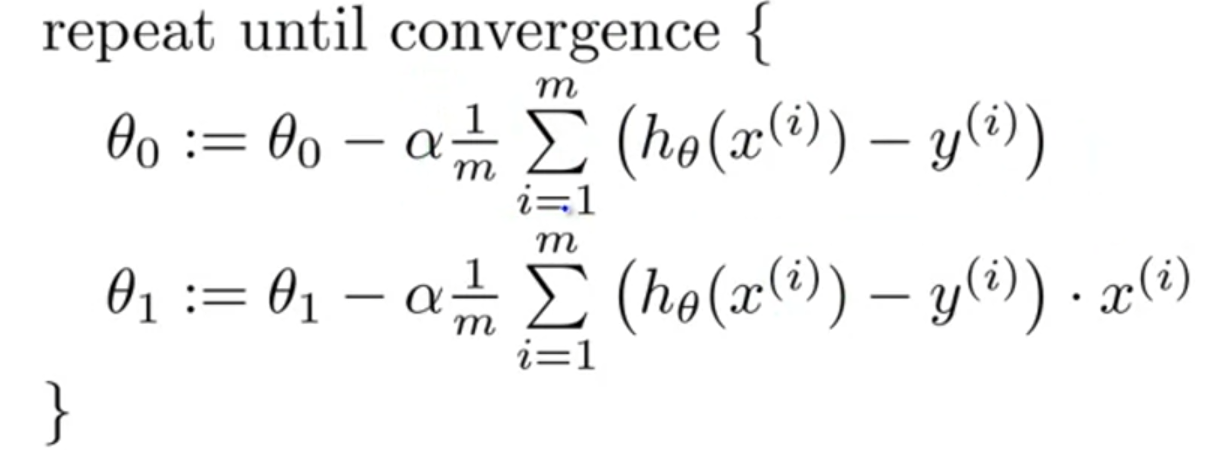

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  import sys


0.934


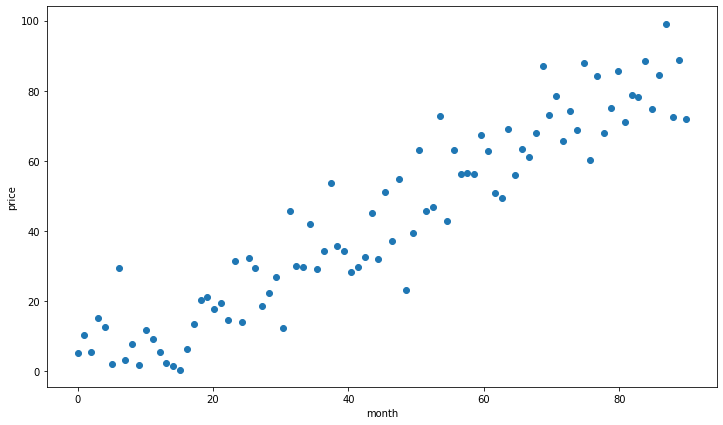

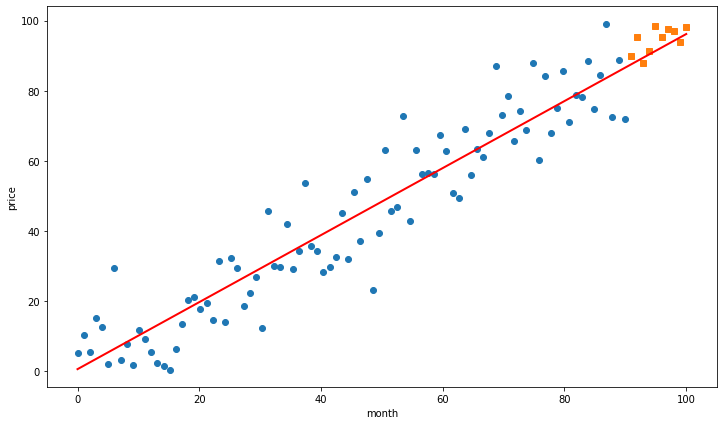

In [ ]:
#练习：房价预测（部分代码来源于CSDN）
import torch
import random
import matplotlib.pyplot as plt

from torch.autograd import Variable #引入自动微分变量
x=Variable(torch.linspace(0,100).type(torch.FloatTensor))
rand=Variable(torch.randn(100))*10
rand2=round(random.uniform(0,2),3)
print(rand2)
y=abs(x*rand2+rand)
#分为训练集和测试集
#图像
xtrain=x[:-10]
xtest=x[-10:]
ytrain=y[:-10]
ytest=y[-10:]
plt.figure(figsize=(12,7))
plt.plot(xtrain,ytrain,'o')
plt.xlabel('month')
plt.ylabel('price')
plt.show()
#y=ax+b
a=Variable(torch.rand(1),requires_grad=True)
b=Variable(torch.rand(1),requires_grad=True)
rate=0.0001 ##learning rate
for i in range(3000): #迭代3000次
  ypredict=a.expand_as(xtrain)*xtrain+b.expand_as(xtrain)
  loss=torch.mean((ypredict-ytrain)**2)
  loss.backward()
  a.data.add_(-rate*a.grad.data)
  b.data.add_(-rate*b.grad.data)
  a.grad.data.zero_()
  b.grad.data.zero_()            #容易犯错的地方。每次迭代后都需要清空梯度，否则会一直累加   
x1=xtest.data.numpy()
y1=ytest.data.numpy()
plt.figure(figsize=(12,7))
plt.plot(xtrain,ytrain,'o') #圆形点表示训练集
plt.plot(x1,y1,'s') #方形点表示测试集
hypothesis=str(a.data.numpy()[0])+'x'+str(b.data.numpy()[0])
y2=a.data.numpy()*x.data.numpy()+b.data.numpy()
plt.plot(x, y2, ls='-', lw=2, label=hypothesis, color='red')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

虽然对于python的函数仍不是太熟悉，这段代码大部分也靠Ctrl+c,ctrl+v。但通过这次线性回归的练习，还是加深了对损失函数，梯度下降，梯度反转，自动微分变量等概念的理解。

#### Gradient Descent in Practise梯度下降应用的技巧

1.   feature scaling:使变量的范围为[-1,1]左右。过小过大都不好。
2.   mean normalization：使变量的变化范围的中值为0。
上面两条合在一起总结出的公式为：
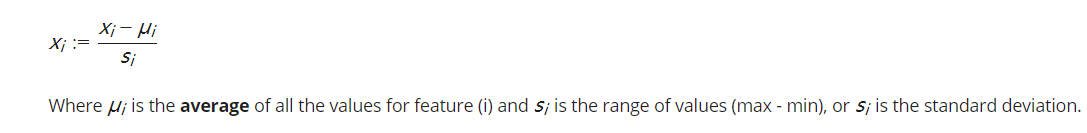


  即$x_i$范围变为[-0.5,0.5]

  3.learning rate:
  
  -debugging:How to make sure gradient descent is working correctly
  
  Example automatic convergence test:

declare convergence if    decreases by less than 10^-3 in one iteration.

but choosing what this threshold is is pretty difficult , and the plot can tell you gradient descent is working correctly or not.

Here are three typical examples：
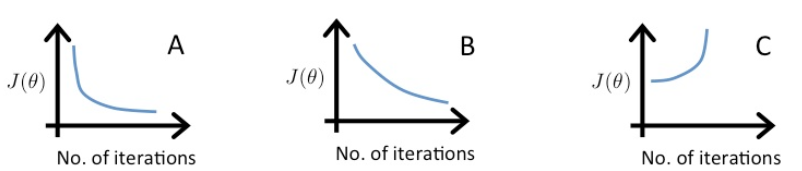

In graph C, the cost function is increasing, so the learning rate is set too high. Both graphs A and B converge to an optimum of the cost function, but graph B does so very slowly, so its learning rate is set too low. Graph A lies between the two.

-How to choose learning rate:
   
    ...,0.001,0.003,0.01,0.03,0.1,0.3...
   
   and so on,you can eventually reach a proper learning rate.

4.Polynomial Regression多项式回归

Our hypothesis function need not be linear if that does not fit the data well.

We can change the behavior or curve of our hypothesis function by making it a quadratic, cubic or square root function (or any other form).

我们可以将$x$的非齐次项如$x^{2}$,$x^{1/2}$当作新的特征值$x_1$,$x_2$。

在此基础上，我们依然可以通过feature scaling和mean normalization来优化运算。

#### 二、正规方程（normal equation）
 
  其实就是在寻找解析解。
  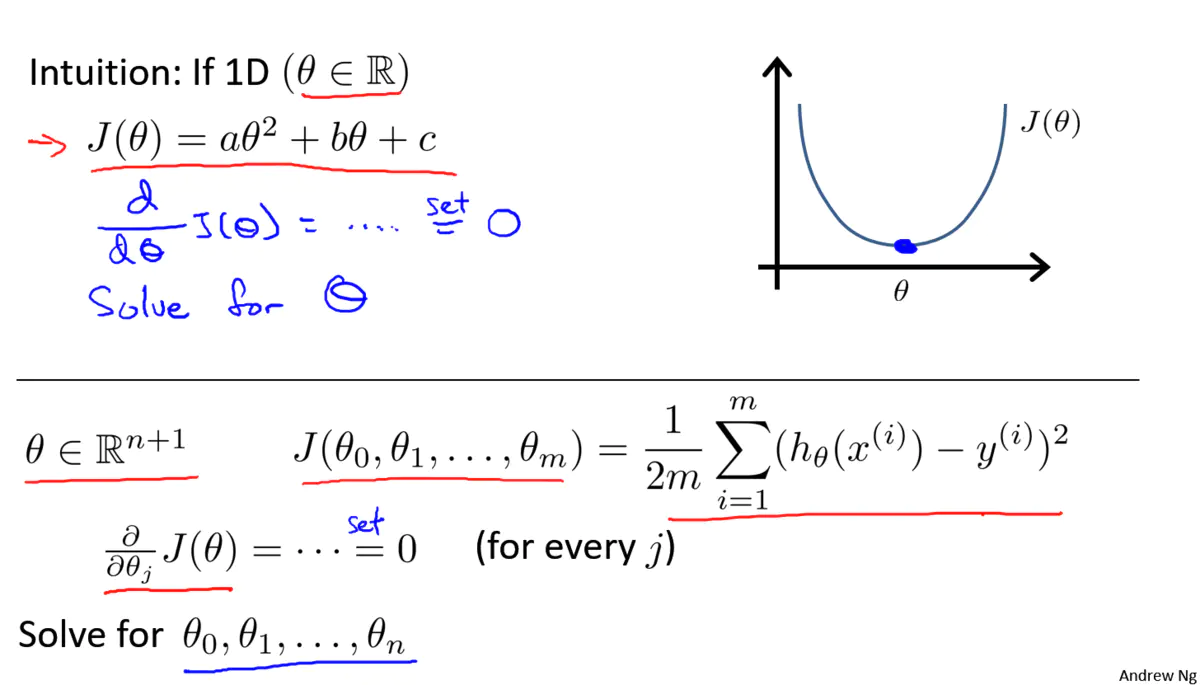

转变为熟悉的线性代数问题——矩阵求逆

注意：最小二乘解是由式子 $X$*${\theta}$=$y$式子两边同时左乘$(X^ \mathrm{ T }X)^{-1}$$X^ \mathrm{ T }$得到。

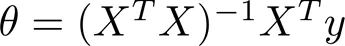

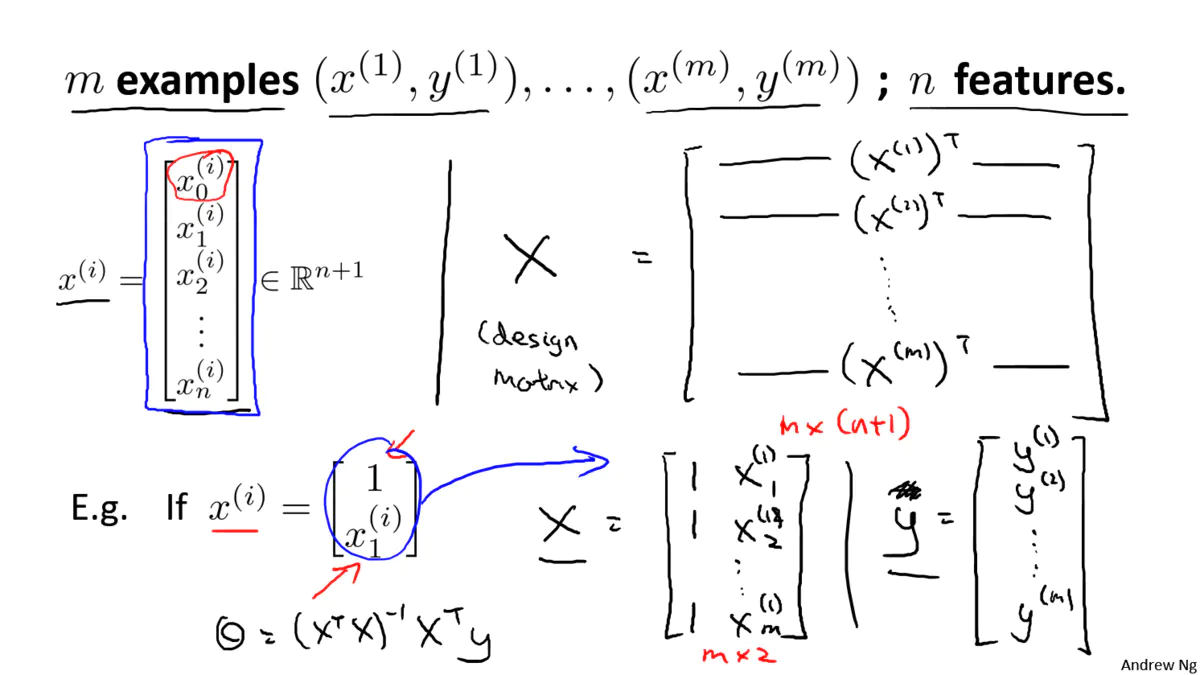

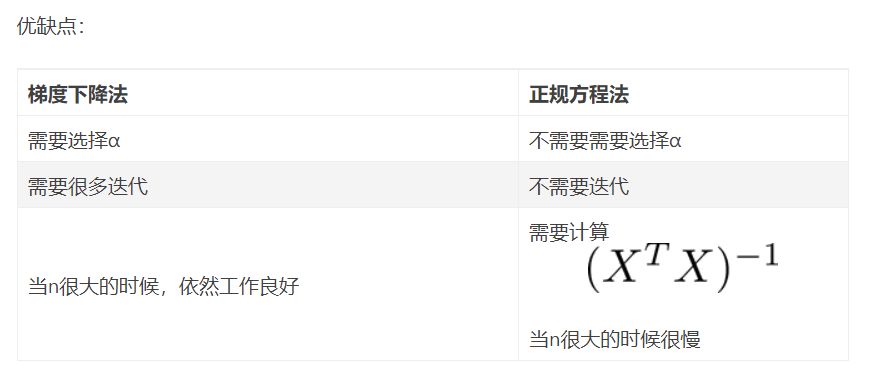

若$ X^ \mathrm{ T }X $不可逆时：

1.   线性相关：
    
    Redundant features, where two features are very closely related (i.e. they are linearly dependent)
2.   数据不足：

    Too many features (e.g. m ≤ n). In this case, delete some features or use "regularization" (to be explained in a later lesson).

解决方案：

   Deleting a feature that is linearly dependent with another or deleting one or more features when there are too many features.


###classifiaction分类问题
---由于截至本周末即第一周周末吴恩达的机器学习课程进度未到“分类”问题。故此处摘引无系小学期python课程大作业——人脸识别指引书，并尝试解决该人脸识别问题。








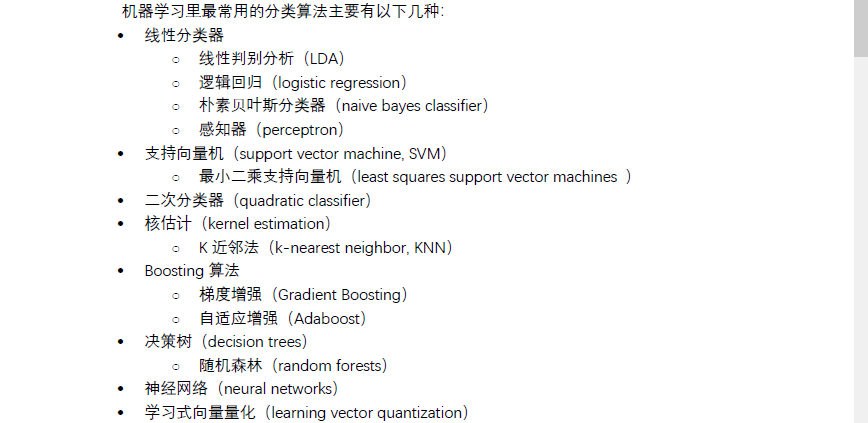

In [ ]:
#人脸识别
import torch
